# Открытие кафе

**Цель:** привлечь средства инвесторов для открытия кафе в Москве, где гостей обслуживают роботы

**Задача:** исследовать текущий рынок общественного питания Москвы, дать рекомендации 

**Шаги:**
- исследовать соотношение видов объектов общественного питания по количеству;
- исследовать соотношение сетевых и несетевых заведений по количеству;
- изучить характеристики сетевого распространения;
- рассчитать среднее количество мест для каждого объекта общественного питания;
- исследовать улицы и районы, где создана наибольшая концентрация объектов питания

## 1. Изучение данных и подготовка их к анализу

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
import numpy as np

In [2]:
try:
    data = pd.read_csv('/home/olga/Downloads/rest_data.csv')
except:
    data = pd.read_csv('/datasets/rest_data.csv')

In [3]:
data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


**Описание данных**

- `id`  — идентификатор объекта;
- `object_name` — название объекта общественного питания;
- `chain` — сетевой ресторан;
- `object_type` — тип объекта общественного питания;
- `address` — адрес;
- `number` — количество посадочных мест

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Пропущенных значений в столбцах нет. Все типы данных приведены корректно. Можно было бы заменить тип в столбце на 'chain' на булев. Но можно и оставить строковый.

Есть смысл проверить наличие дубликатов в названиях, типах заведений и адресах

### Столбец "object_name"

In [5]:
data.duplicated(subset='object_name').sum()

4973

Слишком большое число дубликатов, чтобы можно было просто удалить.

In [6]:
data['object_name'].value_counts().sort_values(ascending=False).head(50)

Столовая                                267
Кафе                                    236
Шаурма                                  234
KFC                                     155
Шоколадница                             142
Макдоналдс                              122
Бургер Кинг                             122
Домино'с Пицца                           86
Теремок                                  84
Крошка Картошка                          82
Пекарня                                  76
Милти                                    65
Суши Wok                                 61
Буфет                                    59
СТОЛОВАЯ                                 52
Папа Джонс                               50
Кофе с собой                             44
Школьно-базовая столовая                 44
Чайхона №1                               42
КАФЕ                                     41
Выпечка                                  36
Кафетерий                                35
Хинкальная                      

Видим, что особенно много дубликатов среди сетевых заведений общественного питания. Однако у нас нет достаточной информации, чтобы понять, относятся ли заведения, схожие по названию, к одной сети, или это точки разных сетей. 

### Столбец 'object_type'

In [7]:
data['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

**Типы объектов**
- `кафе`
- `столовая`
- `закусочная`
- `предприятие быстрого обслуживания`
- `ресторан`
- `кафетерий`
- `буфет`
- `бар`
- `магазин (отдел кулинарии)`

### Столбец 'address'

In [8]:
data['address'].duplicated().sum()

6258

Очень много дубликатов. Может объясняться тем, что различные заведения общественного питания могут находится по одному адресу, напрмимер, в торговых центрах.

### Столбец 'chain'

In [9]:
data['number'].sort_values()

7370        0
6905        0
9853        0
9388        0
9385        0
         ... 
3686     1200
9064     1288
8345     1400
8148     1500
12723    1700
Name: number, Length: 15366, dtype: int64

Заметили, что в некоторых заведениях вообще нет посадочных мест. Возможно, некоторые заведения расположены в фудкортах, где столы не относятся к определенной точке. Также, есть вероятность, что некоторые заведения работают только на доставку/на вынос.

## 2. Анализ данных

### Cоотношение видов объектов общественного питания по количеству

Исследуем соотношение видов объектов общественного питания по количеству. Построим график

In [10]:
object_types = (
    data.groupby('object_type', as_index=False)
    .agg({'object_name':'count'})
    .sort_values(by='object_name', ascending=False)
)

object_types.columns = ['object_type', 'number']

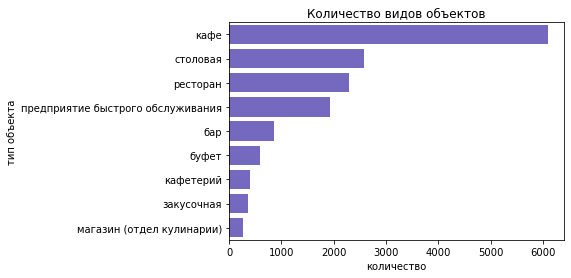

In [11]:
sns.barplot(x='number',y='object_type', data=object_types, color='slateblue').set_title('Количество видов объектов')
plt.xlabel('количество')
plt.ylabel('тип объекта');

Больше всего объектов - кафе. После идут столовая, ресторан и предприятие быстрого обслуживания. Остальных видов обектов сильно меньше вышеперечисленных

### Cоотношение сетевых и несетевых заведений по количеству

In [12]:
(
    data.groupby('chain')['number'].count().sort_values(ascending=False)
)

chain
нет    12398
да      2968
Name: number, dtype: int64

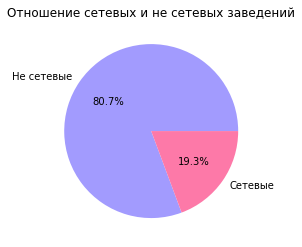

In [13]:
colors = ("#a29bfe", '#fd79a8')
labels = 'Не сетевые', 'Сетевые'

data['chain'].value_counts().plot(kind='pie', colors=colors, labels=labels, autopct='%1.1f%%')
plt.title('Отношение сетевых и не сетевых заведений')
plt.ylabel('');

Несетевых объектов больше сетевых более, чем в четвре раза.

### Виды объектов общественного питания, для которых характерно сетевое распространение

In [14]:
data_chains = (
    data.groupby(['object_type', 'chain'])['chain'].count()
)
data_chains.name = 'count'
data_chains = data_chains.reset_index().sort_values(by='count', ascending=False)
data_chains

,object_type,chain,count
7,кафе,нет,4703
17,столовая,нет,2584
15,ресторан,нет,1741
6,кафе,да,1396
13,предприятие быстрого обслуживания,нет,1132
1,бар,нет,819
12,предприятие быстрого обслуживания,да,791
3,буфет,нет,574
14,ресторан,да,544
9,кафетерий,нет,346


Для каждого вида объекта общественного питания характерно в большей степени сетевое распространение. Проверим, у какого из объектов доля сетевого распространения больше:

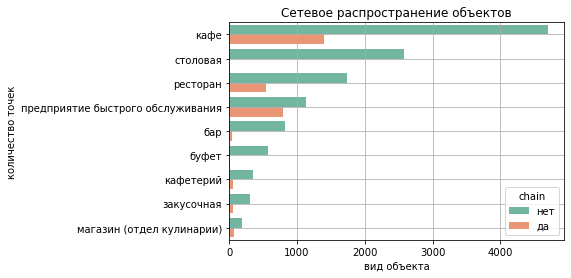

In [15]:
sns.barplot(
    x='count', 
    y='object_type', 
    hue='chain', 
    data=data_chains, 
    palette='Set2')

plt.title('Сетевое распространение объектов')
plt.grid()
plt.xlabel('вид объекта')
plt.ylabel('количество точек');

Больше всего сетевое распространение характерно для предприятий быстрого обслуживания, ресторанов и кафе.

In [16]:
in_chain = data_chains[data_chains['chain']=='да'].sort_values(by='count', ascending=False)
in_chain.head()

,object_type,chain,count
6,кафе,да,1396
12,предприятие быстрого обслуживания,да,791
14,ресторан,да,544
10,магазин (отдел кулинарии),да,78
4,закусочная,да,56


In [17]:
total_count = data_chains.groupby('object_type')['count'].sum().reset_index()
total_count.columns = ['object_type','total_count']
in_chain = in_chain.merge(total_count, on='object_type', how='left')
in_chain['percent'] = (in_chain['count'] / in_chain['total_count']).round(3)
in_chain = in_chain.sort_values(by='percent', ascending=False)

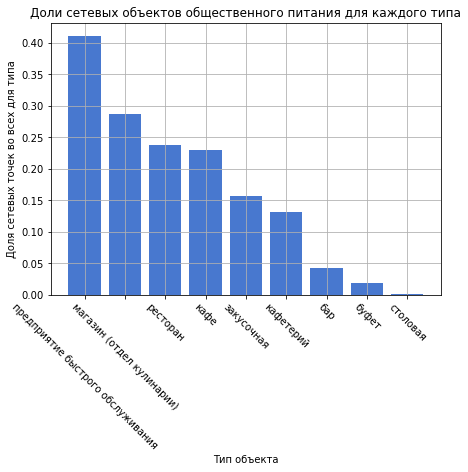

In [18]:
with plt.style.context('seaborn-muted'):
    plt.figure(figsize=(7,5))
    plt.bar(x=in_chain['object_type'], height=in_chain['percent'])
    plt.grid()
    plt.title('Доли сетевых объектов общественного питания для каждого типа')
    plt.ylabel('Доля сетевых точек во всех для типа')
    plt.xlabel('Тип объекта')
    plt.xticks(rotation=-45);

### Характерные особенности сетевых заведений

Определим, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [19]:
# срез по сетевым объектам со средним кол-вом посадочных мест

chains = (
    data.query('chain == "да"')
    .groupby('object_name')
    .agg({'object_name':'count', 'number':'mean'})
)

In [20]:
chains.columns = ['objects_amount', 'mean']
chains.head()

,objects_amount,mean
object_name,,
Beverly Hills Diner,1,88.000000
Bierloga,1,75.000000
Black & White,1,40.000000
Bocconcino,3,66.666667
BooBo,1,46.000000


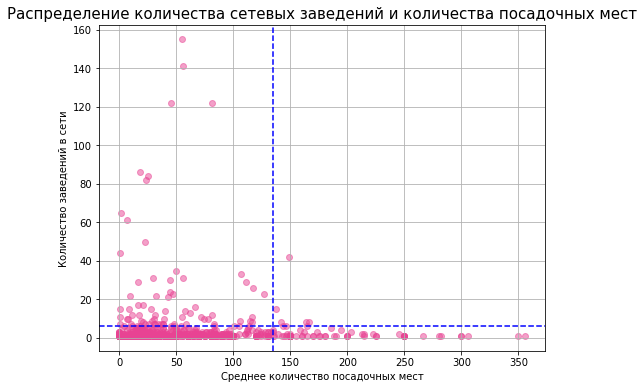

In [21]:
# строим диаграмму рассеяния по количеству сетевых точек 
# и среднему кол-ву посадочных мест

plt.figure(figsize=(8,6))
plt.scatter(chains['mean'], chains['objects_amount'], alpha=0.5, color='#e84393')
plt.grid()
plt.xlabel('Среднее количество посадочных мест')
plt.ylabel('Количество заведений в сети')
plt.title('Распределение количества сетевых заведений и количества посадочных мест', fontsize=15);

# чтобы понять, где расположена большая часть объектов и посадочных мест,
# отметим на графике 90 перцентиль для каждого показателя

plt.axhline(np.percentile(chains['objects_amount'], 90), linestyle='--', color='blue')
plt.axvline(np.percentile(chains['mean'], 90), linestyle='--', color='blue')
plt.show()

Большая часть данных (как заведений, так и посадочных мест) расположена в третьей четверти графика. Таким образом, для сетевиков более характерно небольшое число своих точек и  небольшое/среднее число посадочных мест.

### Cреднее количество посадочных мест для каждого вида объекта общественного питания 

Для каждого вида объекта общественного питания рассчитаем среднее количество посадочных мест. Определим, какой вид предоставляет в среднем самое большое количество посадочных мест.

In [22]:
# группируем по типу объекта и считаем среднее количество мест

avg_seats = (
    data.groupby('object_type')
    .agg({'number':'mean'})
    .sort_values(by='number', ascending=False)
    .reset_index()
)

avg_seats.columns = ['type', 'mean']
avg_seats.head()

,type,mean
0,столовая,130.246618
1,ресторан,96.834136
2,буфет,51.129915
3,бар,43.494159
4,кафе,39.716019


In [23]:
# группируем по типу объекта и считаем медиану

med_seats = (
    data.groupby('object_type')
    .agg({'number':'median'})
    .sort_values(by='number', ascending=False)
    .reset_index()
)

med_seats.columns = ['type', 'median']
med_seats.head()

,type,median
0,столовая,103.0
1,ресторан,80.0
2,бар,35.0
3,буфет,32.0
4,кафе,30.0


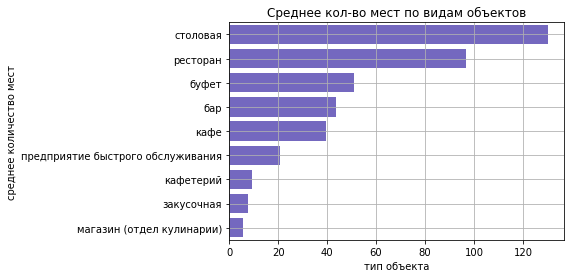

In [24]:
sns.barplot(
    x='mean',
    y='type',
    color='slateblue', 
    data=avg_seats).set_title('Среднее кол-во мест по видам объектов')
plt.xlabel('тип объекта')
plt.ylabel('среднее количество мест')
plt.grid();

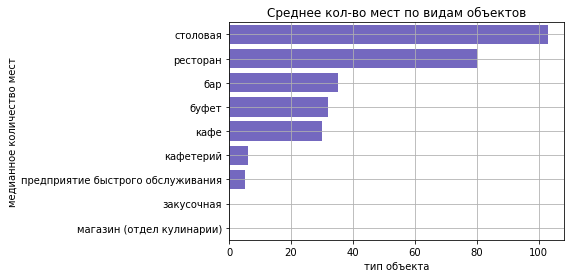

In [25]:
sns.barplot(
    x='median',
    y='type',
    color='slateblue', 
    data=med_seats).set_title('Среднее кол-во мест по видам объектов')
plt.xlabel('тип объекта')
plt.ylabel('медианное количество мест')
plt.grid();

Больше всего посадочных мест наблюдается в столовых. На втором месте - рестораны. Топ-5 замыкают буфеты, бары и кафе.

### Выделение в отдельный столбец информации об улице

Поместим в список все типы улиц, которые могут встретиться в адресе. 
Типы улиц:
https://geodzen.com/streets?type=sq&

In [26]:
street_types = ['улица', 'аллея', 'бульвар', 'дорога', 'квартал',
                'линия', 'массив', 'микрорайон', 'мост', 'набережная', 
                'переулок', 'площадь', 'проезд', 'проспект', 
                'спуск', 'тракты', 'тупик', 'шоссе']

Создадим функцию с вложенным циклом, которая будет перебирать улицы из столбца 'address', а в в каждой строке столбца перебирать слова (типы улиц) из списка выше:

In [27]:
def street_def(data):
    for street in data:
        for street_type in street_types:
            if street_type in street:
                return street

Применим функцию к строкам столбца 'address':

In [28]:
data['street'] = data['address'].str.split(', ').apply(street_def)

In [29]:
data.head()

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


### Топ-10 улиц по количеству объектов общественного питания

Сделаем срез по заданным параметрам:

In [30]:
top_10 = (
    data.groupby('street').agg({'object_name':'count'})
    .reset_index()
    .sort_values(by='object_name', ascending=False)
    .head(10)
)

In [31]:
top_10.columns = ['street', 'count']
top_10

,street,count
1431,проспект Мира,204
1015,Профсоюзная улица,183
688,Ленинградский проспект,173
999,Пресненская набережная,167
401,Варшавское шоссе,165
691,Ленинский проспект,148
1427,проспект Вернадского,132
678,Кутузовский проспект,114
601,Каширское шоссе,112
608,Кировоградская улица,110


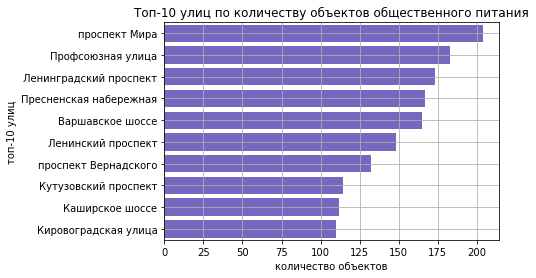

In [32]:
sns.barplot(
    x='count',
    y='street',
    color='slateblue', 
    data=top_10).set_title('Топ-10 улиц по количеству объектов общественного питания')
plt.xlabel('количество объектов')
plt.ylabel('топ-10 улиц')
plt.grid();

Больше всего заведений общественного питания расположены на проспекте мира. За ним идут Профсоюзная улица, Ленинградский проспект, Пресненская набережная и Варшавское шоссе. Узнаем, в каких районах Москвы находятся эти улицы. Импортируем внешний файл с округами и входящими в них улицами:

In [33]:
from io import BytesIO
import requests
spreadsheet_id = '1YxyMFQsSyapfNAc9DolT1_bWQSJ0e1BIcNcCOQl0bUk'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
district = pd.read_csv(BytesIO(r.content))
district.head()

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [34]:
district.columns = ['street', 'area_id', 'okrug', 'area']

Соединим необходимые данные из двух датафреймов

In [35]:
data_merged = top_10.merge(district[['street', 'okrug', 'area']], left_on='street', suffixes=['', '_'], right_on='street')
data_merged.head()

,street,count,okrug,area
0,проспект Мира,204,СВАО,Алексеевский район
1,проспект Мира,204,СВАО,Ярославский Район
2,проспект Мира,204,СВАО,Район Марьина роща
3,проспект Мира,204,СВАО,Останкинский район
4,проспект Мира,204,СВАО,Район Ростокино


In [36]:
data_merged.groupby('street')['area'].unique()

street
Варшавское шоссе          [Район Чертаново Центральное, Район Чертаново ...
Каширское шоссе           [Район Москворечье-Сабурово, Район Нагатино-Са...
Кировоградская улица      [Район Чертаново Центральное, Район Чертаново ...
Кутузовский проспект             [Район Дорогомилово, Район Фили-Давыдково]
Ленинградский проспект    [Район Аэропорт, Район Беговой, Хорошевский ра...
Ленинский проспект        [Район Проспект Вернадского, Район Тропарево-Н...
Пресненская набережная                                  [Пресненский район]
Профсоюзная улица         [Академический район, Район Черемушки, Район Я...
проспект Вернадского      [Район Проспект Вернадского, Район Раменки, Ра...
проспект Мира             [Алексеевский район, Ярославский Район, Район ...
Name: area, dtype: object

In [37]:
data_merged.groupby(['street', 'area'])['okrug'].unique()

street                  area                           
Варшавское шоссе        Донской район                       [ЮАО]
                        Нагорный район                      [ЮАО]
                        Район Нагатино-Садовники            [ЮАО]
                        Район Северное Бутово              [ЮЗАО]
                        Район Чертаново Северное            [ЮАО]
                        Район Чертаново Центральное         [ЮАО]
                        Район Чертаново Южное               [ЮАО]
                        Район Южное Бутово                 [ЮЗАО]
Каширское шоссе         Район Москворечье-Сабурово          [ЮАО]
                        Район Нагатино-Садовники            [ЮАО]
                        Район Орехово-Борисово Северное     [ЮАО]
                        Район Орехово-Борисово Южное        [ЮАО]
Кировоградская улица    Район Чертаново Северное            [ЮАО]
                        Район Чертаново Центральное         [ЮАО]
                    

Как видно, одна улица может относится к разным районам и округам. Общим можно назвать то, что все топ-10 улиц преимущественно располагаются в нескольких округах: ЮАО, ЮЗАО, ЗАО, СВАО, ЦАО, САО. И в нескольких районах. То есть это очень большие улицы, отсюда и много заведений на них

### Число улиц с одним объектом общественного питания

In [38]:
one_object = (
    data.groupby('street', as_index=False).agg({'object_name':'count'})
    .query('object_name == 1')
)

552 улицы, на которых располагается по одному заведению общественного питания из датасета. Узнаем, в каких районах Москвы находятся эти улицы:

In [39]:
# объединяем улицы с одним объектом с датафреймом по районам и округам

one_object_merged = one_object.merge(district[['street', 'okrug', 'area']], left_on='street', right_on='street')

In [40]:
# находим все районы, где располагаются улицы с одним заведением

one_object_merged['area'].sort_values().unique()

array(['Алексеевский район', 'Алтуфьевский район', 'Бабушкинский район',
       'Басманный район', 'Бескудниковский Район', 'Бутырский район',
       'Войковский Район', 'Головинский район', 'Даниловский район',
       'Дмитровский район', 'Донской район', 'Красносельский район',
       'Лосиноостровский район', 'Мещанский район', 'Можайский Район',
       'Молжаниновский район', 'Нагорный район', 'Нижегородский район',
       'Обручевский район', 'Останкинский район', 'Панфиловский район',
       'Пресненский район', 'Район Арбат', 'Район Аэропорт',
       'Район Беговой', 'Район Бирюлево Восточное', 'Район Богородское',
       'Район Внуково', 'Район Восточное Измайлово', 'Район Восточный',
       'Район Выхино-Жулебино', 'Район Гагаринский', 'Район Гольяново',
       'Район Дорогомилово', 'Район Замоскворечье',
       'Район Западное Дегунино', 'Район Зюзино', 'Район Ивановское',
       'Район Измайлово', 'Район Коньково', 'Район Коптево',
       'Район Косино-Ухтомский', 'Район Кот

In [41]:
one_object_merged.groupby('area').agg({'street':'nunique'}).reset_index().sort_values('street', ascending=False)

,area,street
95,Таганский район,27
81,Район Хамовники,26
3,Басманный район,25
96,Тверской район,20
21,Пресненский район,20
...,...,...
43,Район Крюково,1
49,Район Лианозово,1
18,Обручевский район,1
79,Район Филевский Парк,1


Как видим, чаще всего - это улицы в центральных районах, а там много маленьких улочек.

## 3. Общий вывод и рекомендации

Данной работой был исследован текущий рынок общественного питания Москвы для того, чтобы привлечь инвесторов и дать рекомендации по открытию нового кафе.

Большую часть рынка заведений общественного питания занимают кафе, столовые, рестораны и предприятие быстрого обслуживания.
Для будующего заведения рациональнее выбрать кафе или предприятие быстрого обслуживания в (зависимости от кухни), так как предполагается, что заведение будет небольшим. А обслуживать гостей будут роботы. 

Несетевых объектов значительно больше, чем сетевых. Данная тенденция характерна для всех видов объектов. Наибольшее сетевое распространение замечено у предприятий быстрого обслуживания, ресторанов и кафе. Сетевым предприятиям свойственно небольшое число своих точек и небольшое/среднее число посадочных мест.
В нашем случае все зависит от  целей собственника и инвесторов: есть ли желание стать одной из точек одной сети (в таком случае, придется искать максимально похожую концепцию кафе, чтобы соблюсти все ее стандарты и норматимвы) или создать самостоятельную точку с уникальной концепцией и независящими от центрального офиса методами управления.

Были изучено характерное количество посадочных мест для каждого из объектов. Больше всего посадочных мест наблюдается в столовых. На втором месте - рестораны. Топ-5 замыкают буфеты, бары и кафе.

Чтобы понять, в каких местах наибольшая проходимость, мы проанализировали количество заведений общественного питания по округам, районам и улицам. В топ-10 попали следующие:
- проспект Мира
- Профсоюзная улица
- Ленинградский проспект
- Пресненская набережная
- Варшавское шоссе
- Ленинский проспект
- проспект Вернадского
- Кутузовский проспект
- Каширское шоссе
- Кировоградская улица

Стоит рассмотреть их в качестве выбора места для нового кафе. Там, где большая проходимость,  большая и концентрация заведений. Поэтому есть смысл искать помещение именно в таких местах.
Однако стоит обратить внимание и на округа с районами, так как одна улица может входить в несколько округов и районов. Больше всего предприятий расположено в ЮАО и ЮЗАО.

Также были рассмотрены районы, где меньше всего заведений обещственного питания. Большая часть из них - это спальные районы, где нет смысла размещать большое количество точек.
Если инфесторы будущего кафе рассчитывают на высокую проходимость, то чтоит исключить данные районы из потенциального расположения.

## 4. Презентация

https://disk.yandex.ru/i/jVi4fhs8AbFSCg